In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime
import math 
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

### 데이터 설명
- domae_0
- somae_0
- weather_0
- imexport_0
- pummok_0

In [44]:
domae = pd.read_csv("./aT_data/aT_train_raw/domae_0.csv")
somae = pd.read_csv("./aT_data/aT_train_raw/somae_0.csv")
weather = pd.read_csv("./aT_data/aT_train_raw/weather_0_0.csv")
imexport = pd.read_csv("./aT_data/aT_train_raw/imexport_0.csv")
pummok = pd.read_csv("./aT_data/aT_train_raw/pummok_0.csv")

for i in [domae, somae, weather, pummok]:
    i['datadate']=i['datadate'].apply(lambda _ : datetime.strptime(str(_),'%Y%m%d'))
for i in [imexport]:
    i['datadate']=i['datadate'].apply(lambda _ : datetime.strptime(str(_),'%Y%m'))

In [45]:
domae.describe()
domae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14423 entries, 0 to 14422
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datadate  14423 non-null  datetime64[ns]
 1   농산물 부류명   13910 non-null  object        
 2   등급코드      13910 non-null  float64       
 3   등급명       13910 non-null  object        
 4   조사단위(kg)  13910 non-null  object        
 5   시도별 구분    13910 non-null  float64       
 6   지역명       13910 non-null  object        
 7   시장코드      13910 non-null  float64       
 8   시장명       13910 non-null  object        
 9   가격(원)     13910 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 1.1+ MB


In [46]:
domae['조사단위(kg)'].value_counts()
#domae.groupby(["시장명","가격(원)"]).value_counts()

35kg    13910
Name: 조사단위(kg), dtype: int64

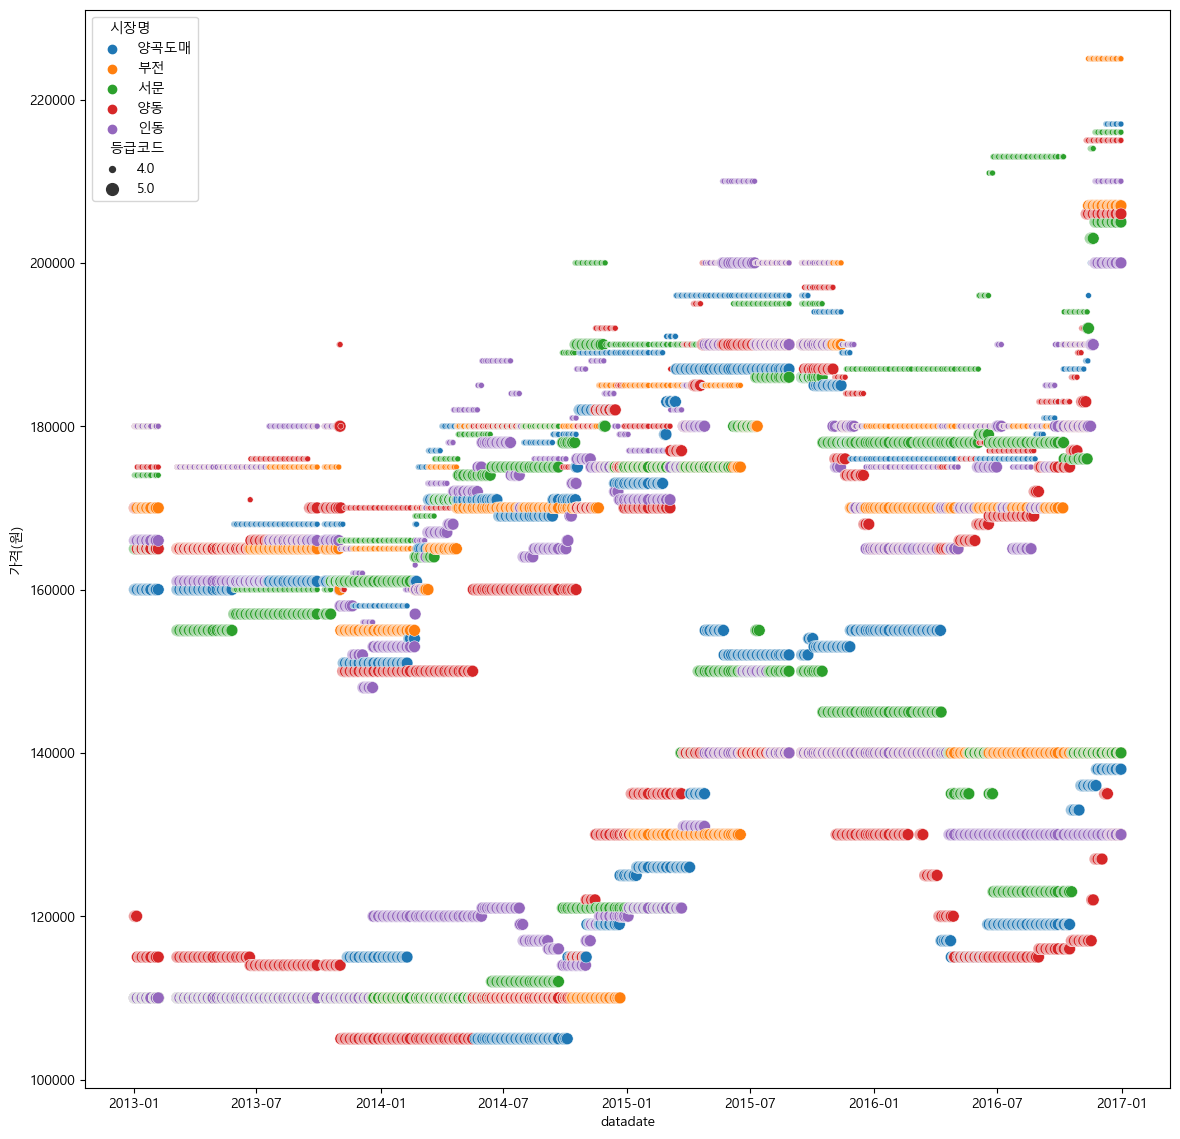

In [47]:
dataset = domae[["시장명","가격(원)","datadate","등급코드"]]
plt.figure(figsize=(14,14))
# ax = sns.scatterplot(data=dataset, x="datadate", y="가격(원)", hue="시도별 구분",size="등급코드", palette=["C0", "C1", "C2", "k"])
ax = sns.scatterplot(data=dataset, x="datadate", y="가격(원)", hue="시장명",size="등급코드")

In [48]:
somae.head(5)

,datadate,농산물 부류명,등급코드,등급명,조사단위(kg),시도별 구분,지역명,시장코드,시장명,가격(원)
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,식량작물,4.0,상품,500g,1101.0,서울,110212.0,경동,3500.0
2,2013-01-02,식량작물,4.0,상품,500g,1101.0,서울,110213.0,복조리,3590.0
3,2013-01-02,식량작물,4.0,상품,500g,1101.0,서울,110251.0,영등포,3500.0
4,2013-01-02,식량작물,4.0,상품,500g,1101.0,서울,110401.0,E-유통,4280.0


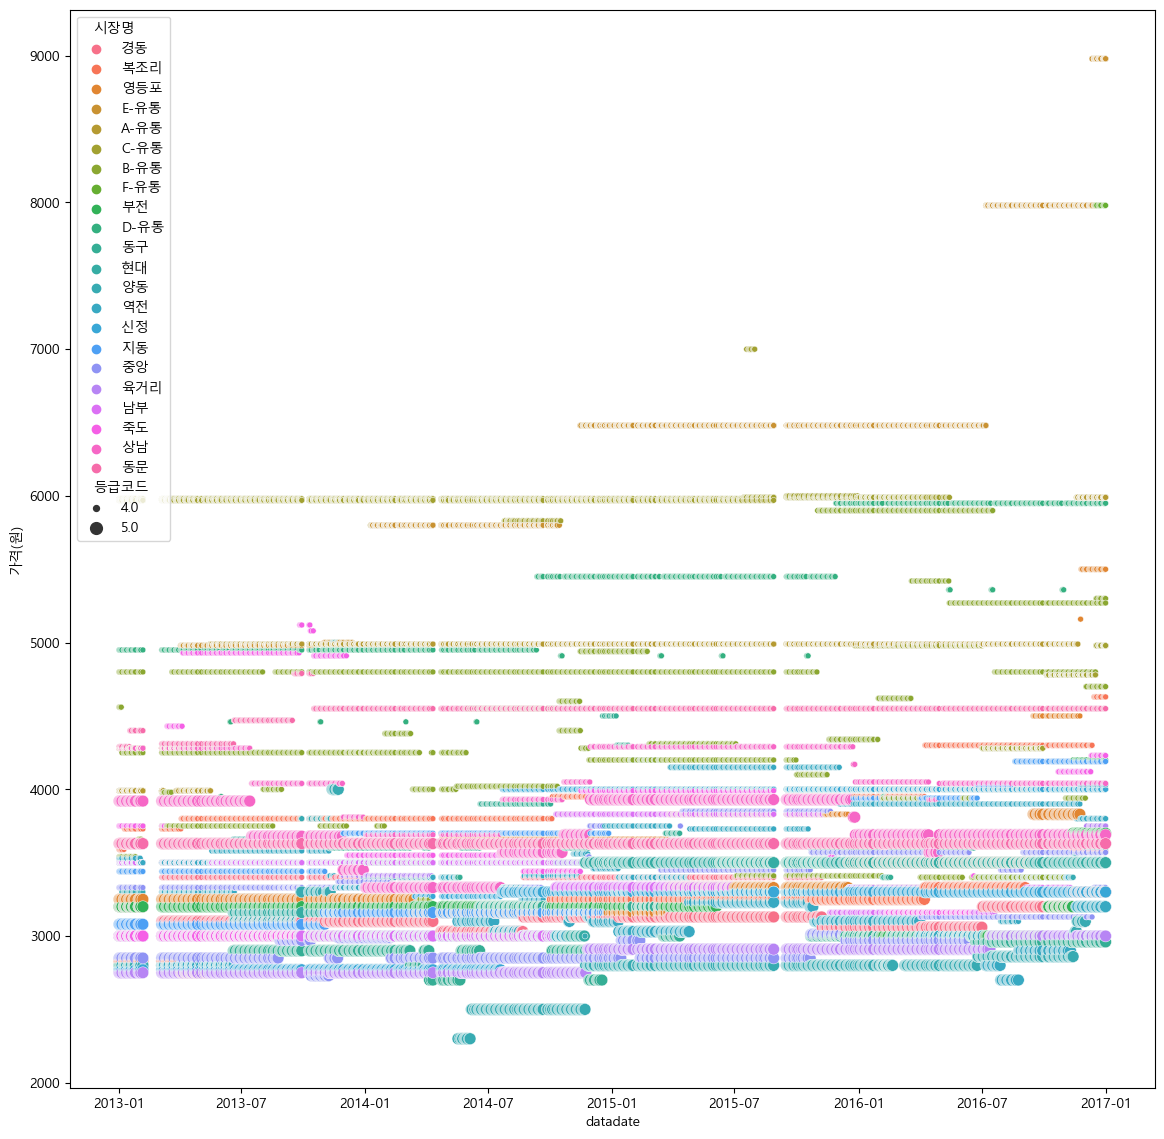

In [49]:
dataset = somae[["시장명","가격(원)","datadate","등급코드"]]
plt.figure(figsize=(14,14))
# ax = sns.scatterplot(data=dataset, x="datadate", y="가격(원)", hue="시도별 구분",size="등급코드", palette=["C0", "C1", "C2", "k"])
ax = sns.scatterplot(data=dataset, x="datadate", y="가격(원)", hue="시장명",size="등급코드")

In [50]:
weather.head(5)

,datadate,초기온도(℃),최대온도(℃),최저온도(℃),평균온도(℃),강수량(ml),습도(%)
0,2013-01-01,-3.9,4.4,-7.7,-1.4,0.0,
1,2013-01-02,2.8,6.7,-1.1,3.5,0.0,
2,2013-01-03,-1.2,5.0,-6.3,-1.2,0.0,
3,2013-01-04,-1.7,6.8,-4.5,0.9,0.0,
4,2013-01-05,-4.6,6.2,-6.1,-0.7,0.0,


In [51]:
weather.columns

Index(['datadate', '초기온도(℃)', '최대온도(℃)', '최저온도(℃)', '평균온도(℃)', '강수량(ml)',
       '습도(%)'],
      dtype='object')

c:\Users\mai\anaconda3\envs\nongnet\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\mai\anaconda3\envs\nongnet\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


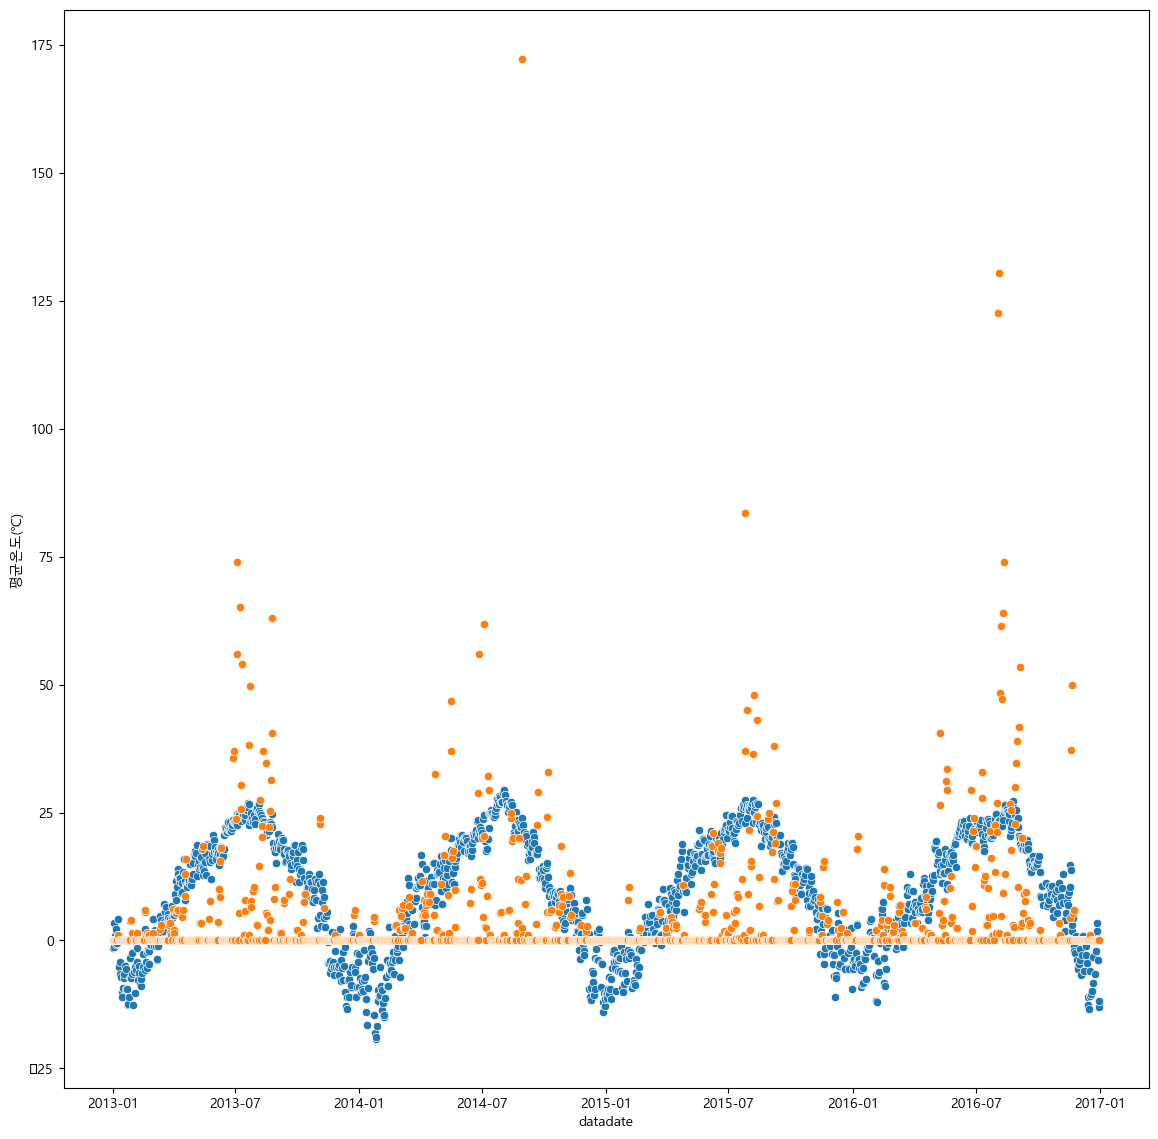

In [52]:
dataset = weather[["평균온도(℃)","강수량(ml)","datadate"]]
plt.figure(figsize=(14,14))
# ax = sns.scatterplot(data=dataset, x="datadate", y="가격(원)", hue="시도별 구분",size="등급코드", palette=["C0", "C1", "C2", "k"])
ax = sns.scatterplot(data=dataset, x="datadate", y="평균온도(℃)")
ax = sns.scatterplot(data=dataset, x="datadate", y="강수량(ml)")

In [53]:
imexport.head(4)

,datadate,수출중량(kg),수출금액(달러),수입중량(kg),수입금액(달러),무역수지(달러)
0,2013-01-01,0.0,0.0,1864728.0,1195211.0,-1195211.0
1,2013-02-01,80.0,695.0,1285922.0,999313.0,-998618.0
2,2013-03-01,0.0,0.0,1489609.0,1464733.0,-1464733.0
3,2013-04-01,0.0,0.0,1441550.0,1190657.0,-1190657.0


c:\Users\mai\anaconda3\envs\nongnet\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


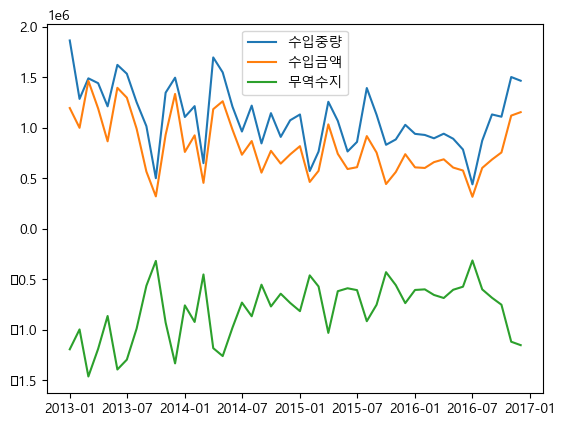

In [54]:
plt.plot(imexport.datadate, imexport["수입중량(kg)"], label="수입중량")
plt.plot(imexport.datadate, imexport["수입금액(달러)"], label="수입금액")
plt.plot(imexport.datadate, imexport["무역수지(달러)"], label="무역수지")
plt.legend()
plt.show()

In [108]:
t = pummok["도매법인코드"].values[0]

In [109]:
pummok["도매시장코드"] = pummok["도매시장코드"].apply(lambda _ : str(math.floor(_) if _ != _ else _))
pummok["도매법인코드"] = pummok["도매시장코드"].apply(lambda _ : str(math.floor(_) if _ != _ else _))
pummok.head(5)

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원)
0,2013-01-01,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN
1,2013-01-02,6143.85,2.0,12312.3,1.0,371501,371501,740.0,20712.240909
2,2013-01-02,4304.30,10.0,42957.0,1.0,350301,350301,570.0,20712.240909
3,2013-01-02,39960.00,10.0,400400.0,1.0,240001,240001,519.0,20712.240909
4,2013-01-03,1898.10,48.0,91108.8,1.0,230001,230001,800.0,3401.863678


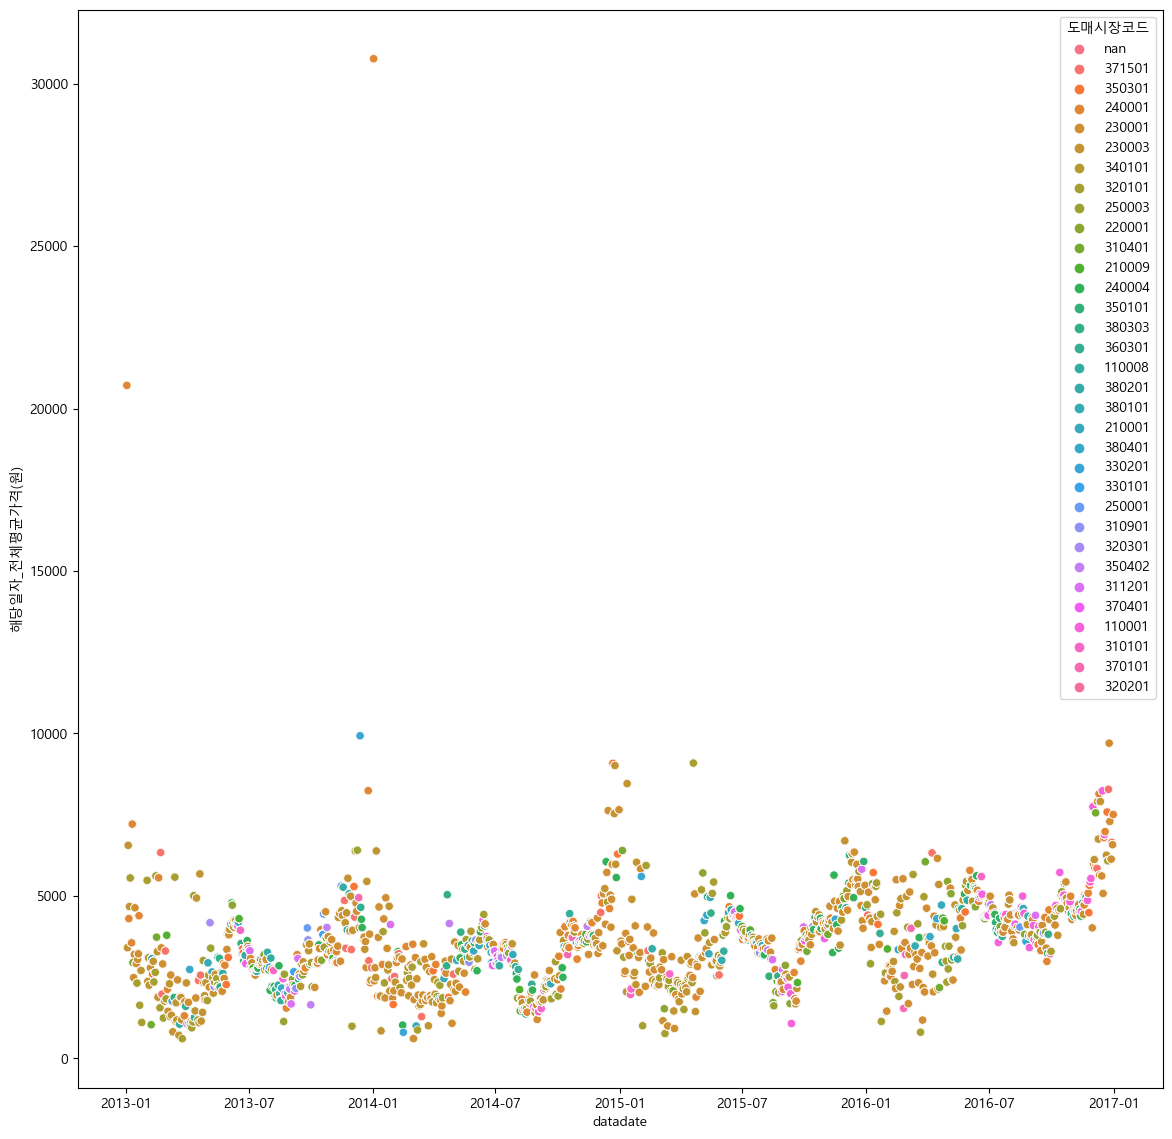

In [110]:
dataset = pummok[["해당일자_전체평균가격(원)","datadate","도매시장코드"]]
plt.figure(figsize=(14,14))
# ax = sns.scatterplot(data=dataset, x="datadate", y="가격(원)", hue="시도별 구분",size="등급코드", palette=["C0", "C1", "C2", "k"])
ax = sns.scatterplot(data=dataset, x="datadate", y="해당일자_전체평균가격(원)", hue="도매시장코드")